In [218]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [219]:
data = pd.read_csv('mushrooms.csv')

In [220]:
data.replace('?', value=np.nan, inplace=True)
data.dropna(inplace=True)

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 0 to 8114
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     5644 non-null   object
 1   cap-shape                 5644 non-null   object
 2   cap-surface               5644 non-null   object
 3   cap-color                 5644 non-null   object
 4   bruises                   5644 non-null   object
 5   odor                      5644 non-null   object
 6   gill-attachment           5644 non-null   object
 7   gill-spacing              5644 non-null   object
 8   gill-size                 5644 non-null   object
 9   gill-color                5644 non-null   object
 10  stalk-shape               5644 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  5644 non-null   object
 13  stalk-surface-below-ring  5644 non-null   object
 14  stalk-color-above-ring    564

In [222]:
temp = { "p" :0, "e": 1 }
for dataset in [data]: 
    dataset["class"] = dataset["class"].map(temp)

In [223]:
print(np.unique(data["cap-shape"]))
print(np.unique(data["cap-surface"]))
print(np.unique(data["cap-color"]))
print(np.unique(data["bruises"]))
print(np.unique(data["odor"]))
print(np.unique(data["gill-attachment"]))
print(np.unique(data["gill-spacing"]))
print(np.unique(data["gill-size"]))
print(np.unique(data["gill-color"]))
print(np.unique(data["stalk-shape"]))
print(np.unique(data["stalk-root"]))
print(np.unique(data["stalk-surface-above-ring"]))
print(np.unique(data["stalk-surface-below-ring"]))
print(np.unique(data["stalk-color-above-ring"]))
print(np.unique(data["stalk-color-below-ring"]))
print(np.unique(data["veil-type"]))
print(np.unique(data["veil-color"]))
print(np.unique(data["ring-number"]))
print(np.unique(data["ring-type"]))
print(np.unique(data["spore-print-color"]))
print(np.unique(data["population"]))
print(np.unique(data["habitat"]))

['b' 'c' 'f' 'k' 's' 'x']
['f' 'g' 's' 'y']
['b' 'c' 'e' 'g' 'n' 'p' 'w' 'y']
['f' 't']
['a' 'c' 'f' 'l' 'm' 'n' 'p']
['a' 'f']
['c' 'w']
['b' 'n']
['g' 'h' 'k' 'n' 'p' 'r' 'u' 'w' 'y']
['e' 't']
['b' 'c' 'e' 'r']
['f' 'k' 's' 'y']
['f' 'k' 's' 'y']
['b' 'c' 'g' 'n' 'p' 'w' 'y']
['b' 'c' 'g' 'n' 'p' 'w' 'y']
['p']
['w' 'y']
['n' 'o' 't']
['e' 'l' 'n' 'p']
['h' 'k' 'n' 'r' 'u' 'w']
['a' 'c' 'n' 's' 'v' 'y']
['d' 'g' 'l' 'm' 'p' 'u']


Thực hiện chuyển đổi các cột kí tự thành số

In [224]:
temp2 = {'b':0, 'c':1, 'f':2, 'k':3, 's':4, 'x':5}
for dataset in [data]: 
    dataset['cap-shape'] = dataset["cap-shape"].map(temp2)

In [225]:
temp3 = {'f':0, 'g':1, 's':2, 'y':3}
for dataset in [data]: 
    dataset['cap-surface'] = dataset["cap-surface"].map(temp3)

In [226]:
temp4 = {'b': 0,'c':1, 'e':2, 'g':3, 'n':4, 'p':5, 'w':6,'y':7}
for dataset in [data]: 
    dataset['cap-color'] = dataset["cap-color"].map(temp4)

In [227]:
temp5 = { "f" :0, "t": 1 }
for dataset in [data]: 
    dataset["bruises"] = dataset["bruises"].map(temp5)

In [228]:
temp6 = {'a': 0,'c':1, 'f':2, 'l':3, 'm':4, 'n':5, 'p':6}
for dataset in [data]: 
    dataset['odor'] = dataset["odor"].map(temp6)

In [229]:
temp7 = { "a" :0, "f": 1 }
for dataset in [data]: 
    dataset["gill-attachment"] = dataset["gill-attachment"].map(temp7)

In [230]:
temp8 = { "c" :0, "w": 1 }
for dataset in [data]: 
    dataset["gill-spacing"] = dataset["gill-spacing"].map(temp8)

In [231]:
temp9 = { "b" :0, "n": 1 }
for dataset in [data]: 
    dataset["gill-size"] = dataset["gill-size"].map(temp9)

In [232]:
temp10 = {'g':0, 'h':1, 'k':2, 'n':3,'p':4, 'r':5, 'u':6, 'w':7, 'y':8}
for dataset in [data]: 
    dataset['gill-color'] = dataset["gill-color"].map(temp10)

In [233]:
temp11 = { "e" :0, "t": 1 }
for dataset in [data]: 
    dataset["stalk-shape"] = dataset["stalk-shape"].map(temp11)

In [234]:
temp12 = { "b" :0, "c": 1, "e":2, "r":3 }
for dataset in [data]: 
    dataset["stalk-root"] = dataset["stalk-root"].map(temp12)

In [235]:
temp13 = { "f" :0, "k": 1, "s":2, "y":3 }
for dataset in [data]: 
    dataset["stalk-surface-above-ring"] = dataset["stalk-surface-above-ring"].map(temp13)
    dataset["stalk-surface-below-ring"] = dataset["stalk-surface-below-ring"].map(temp13)

In [236]:
temp15 = { "b" :0, "c": 1, "g":2, "n":3,'p':4, "w":5, "y":6}
for dataset in [data]: 
    dataset["stalk-color-above-ring"] = dataset["stalk-color-above-ring"].map(temp15)
    dataset["stalk-color-below-ring"] = dataset["stalk-color-below-ring"].map(temp15)

In [237]:
temp16 = {"p": 0}
for dataset in [data]: 
    dataset["veil-type"] = dataset["veil-type"].map(temp16)

In [238]:
temp17 = {"w": 0, "y":1}
for dataset in [data]: 
    dataset["veil-color"] = dataset["veil-color"].map(temp17)

In [239]:
temp18 = {"n": 0, "o":1, "t":2}
for dataset in [data]: 
    dataset["ring-number"] = dataset["ring-number"].map(temp18)

In [240]:
temp19 = {'e':0, 'l':1, 'n':2, 'p':3}
for dataset in [data]: 
    dataset["ring-type"] = dataset["ring-type"].map(temp19)

In [241]:
temp20 = {'h':0, 'k':1, 'n':2, 'r':3, 'u':4, 'w':5}
for dataset in [data]: 
    dataset["spore-print-color"] = dataset["spore-print-color"].map(temp20)

In [242]:
temp21 = {'a':0, 'c':1, 'n':2, 's':3, 'v':4, 'y':5}
for dataset in [data]: 
    dataset["population"] = dataset["population"].map(temp21)

In [243]:
temp22 = {'d':0, 'g':1, 'l':2, 'm':3, 'p':4, 'u':5}
for dataset in [data]: 
    dataset["habitat"] = dataset["habitat"].map(temp22)

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 0 to 8114
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     5644 non-null   int64
 1   cap-shape                 5644 non-null   int64
 2   cap-surface               5644 non-null   int64
 3   cap-color                 5644 non-null   int64
 4   bruises                   5644 non-null   int64
 5   odor                      5644 non-null   int64
 6   gill-attachment           5644 non-null   int64
 7   gill-spacing              5644 non-null   int64
 8   gill-size                 5644 non-null   int64
 9   gill-color                5644 non-null   int64
 10  stalk-shape               5644 non-null   int64
 11  stalk-root                5644 non-null   int64
 12  stalk-surface-above-ring  5644 non-null   int64
 13  stalk-surface-below-ring  5644 non-null   int64
 14  stalk-color-above-ring    5644 non-null   int

<Axes: >

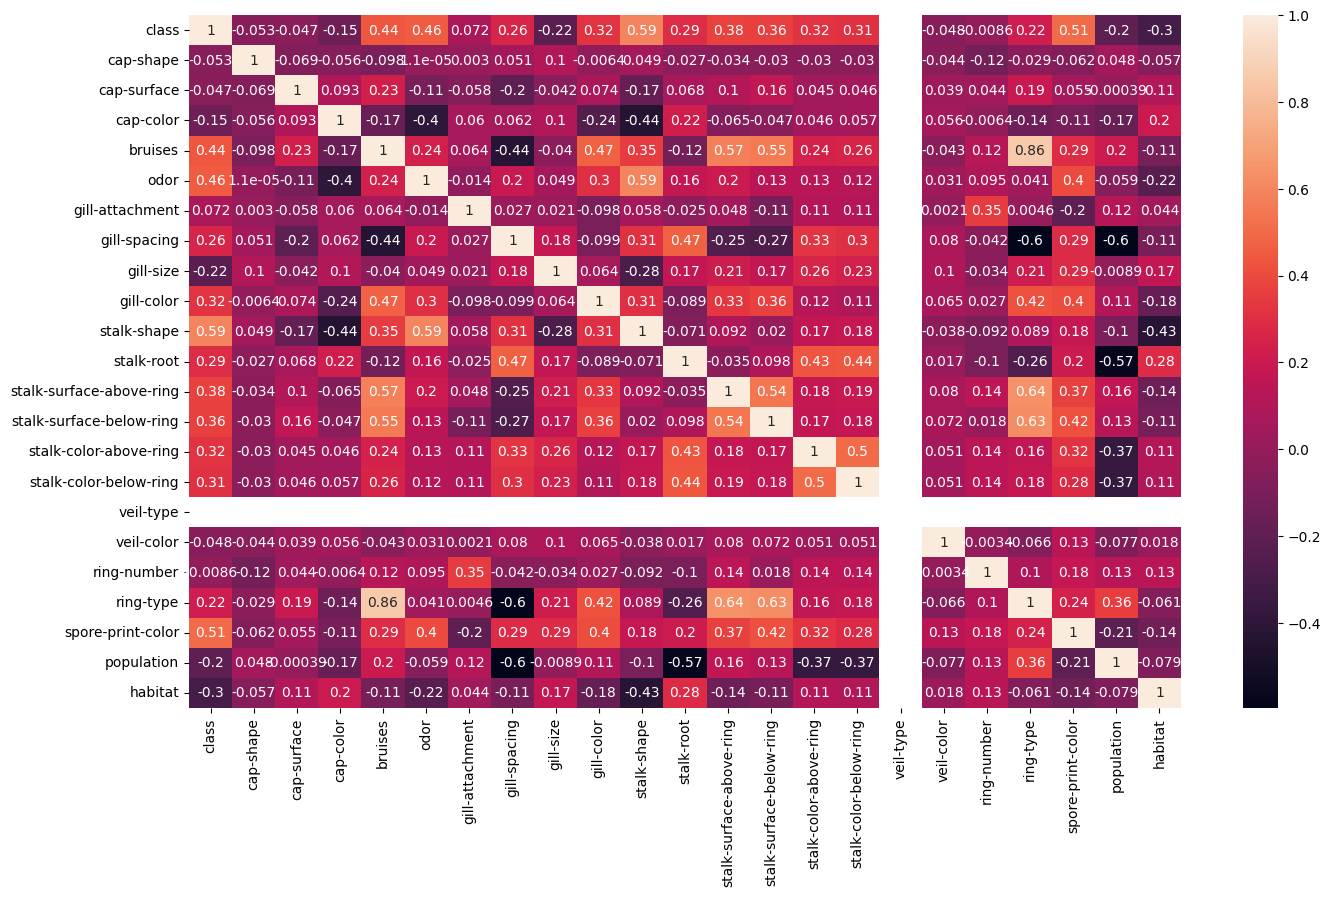

In [245]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'),annot=True)

In [246]:
data.drop(['veil-type','gill-attachment','ring-type','stalk-color-above-ring','gill-size','stalk-root',
           'gill-color','stalk-shape','population','stalk-color-below-ring','spore-print-color',
           'stalk-surface-below-ring','odor','stalk-surface-above-ring'], axis=1, inplace=True)

In [247]:
features = data.drop('class',axis=1)
labels = data['class']

Chia dữ liệu đầu vào thành hai phần huấn luyện 70% và kiểm thử 30%.

In [248]:
X_train,X_test,Y_train,Y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [249]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [250]:
tree_pred = clf.predict(X_test)

tree_score = metrics.accuracy_score(Y_test, tree_pred)
print("Accuracy",tree_score)
print("Report", metrics.classification_report(Y_test, tree_pred))

Accuracy 0.9858323494687131
Report               precision    recall  f1-score   support

           0       0.99      0.98      0.98       636
           1       0.99      0.99      0.99      1058

    accuracy                           0.99      1694
   macro avg       0.99      0.98      0.98      1694
weighted avg       0.99      0.99      0.99      1694



In [252]:
tree_cm = metrics.confusion_matrix(Y_test,tree_pred)
tree_cm

array([[ 621,   15],
       [   9, 1049]], dtype=int64)

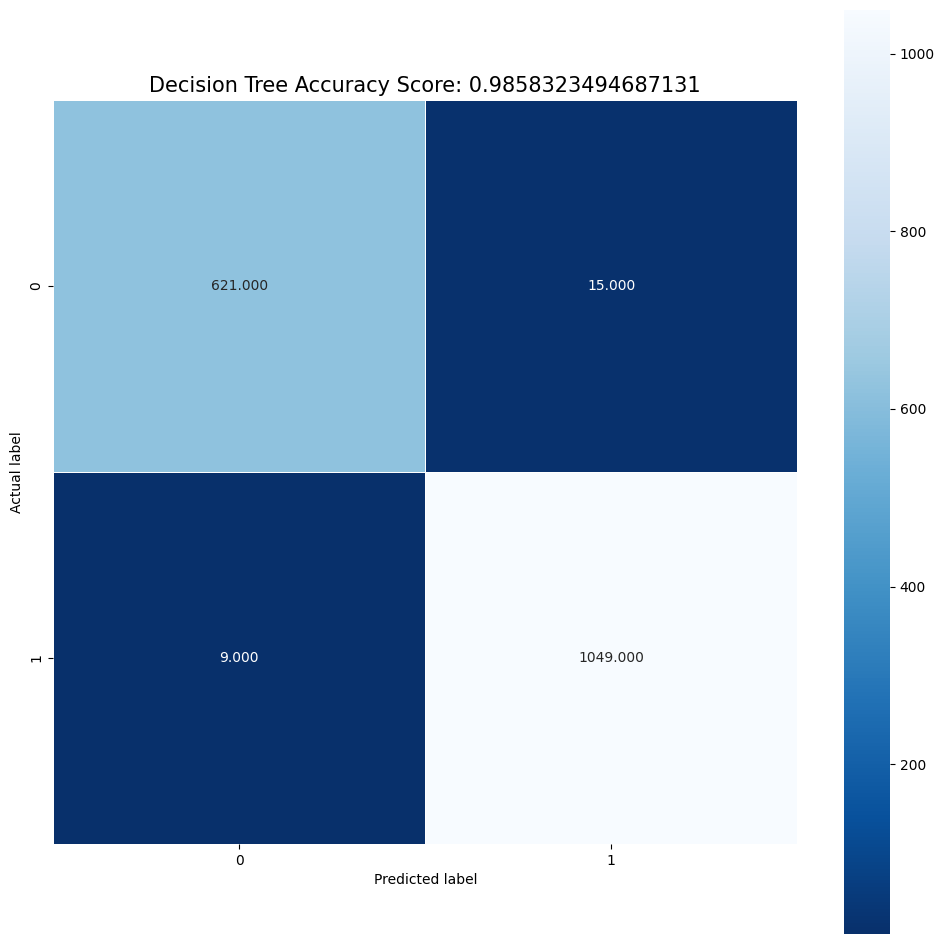

In [254]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f",linewidths=.5, square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title,size=15);

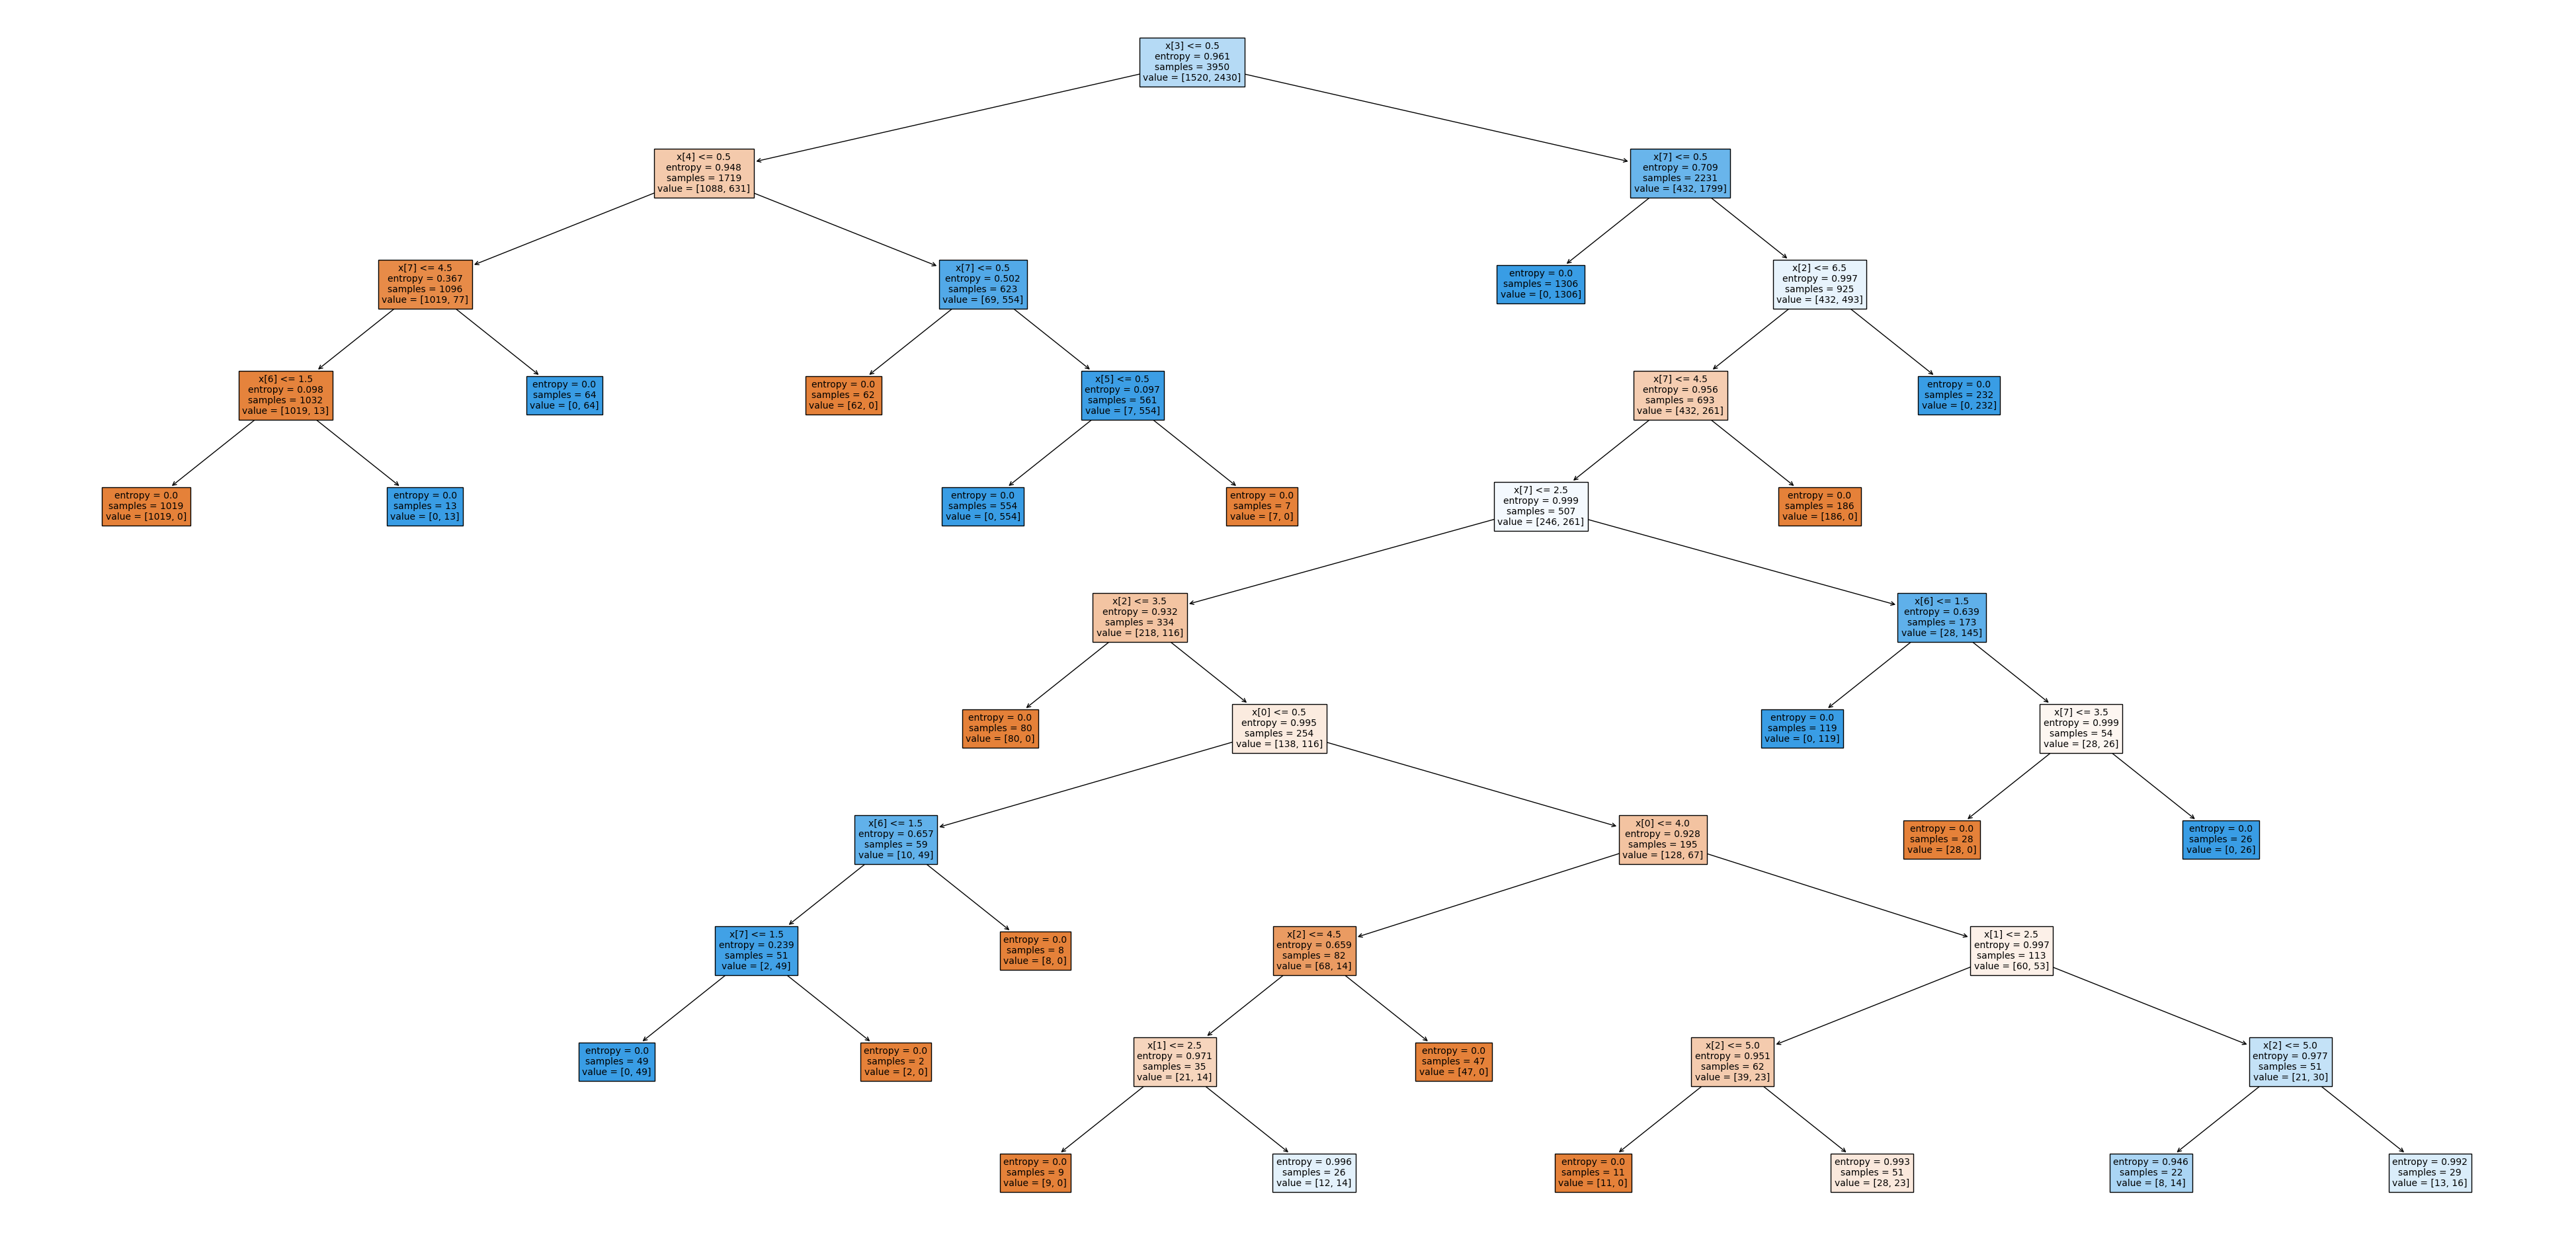

In [255]:
#Biểu diễn cây ID3 
fig,ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [257]:
#Xây dựng cây CART
clf2= tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf2.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [258]:
tree_pred2 = clf.predict(X_test)

tree_score2 = metrics.accuracy_score(Y_test, tree_pred2)
print("Accuracy",tree_score2)
print("Report", metrics.classification_report(Y_test, tree_pred2))

Accuracy 0.9858323494687131
Report               precision    recall  f1-score   support

           0       0.99      0.98      0.98       636
           1       0.99      0.99      0.99      1058

    accuracy                           0.99      1694
   macro avg       0.99      0.98      0.98      1694
weighted avg       0.99      0.99      0.99      1694



In [259]:
#Ma trận nhầm lẫn
tree_cm2 = metrics.confusion_matrix(Y_test,tree_pred2)
tree_cm2

array([[ 621,   15],
       [   9, 1049]], dtype=int64)

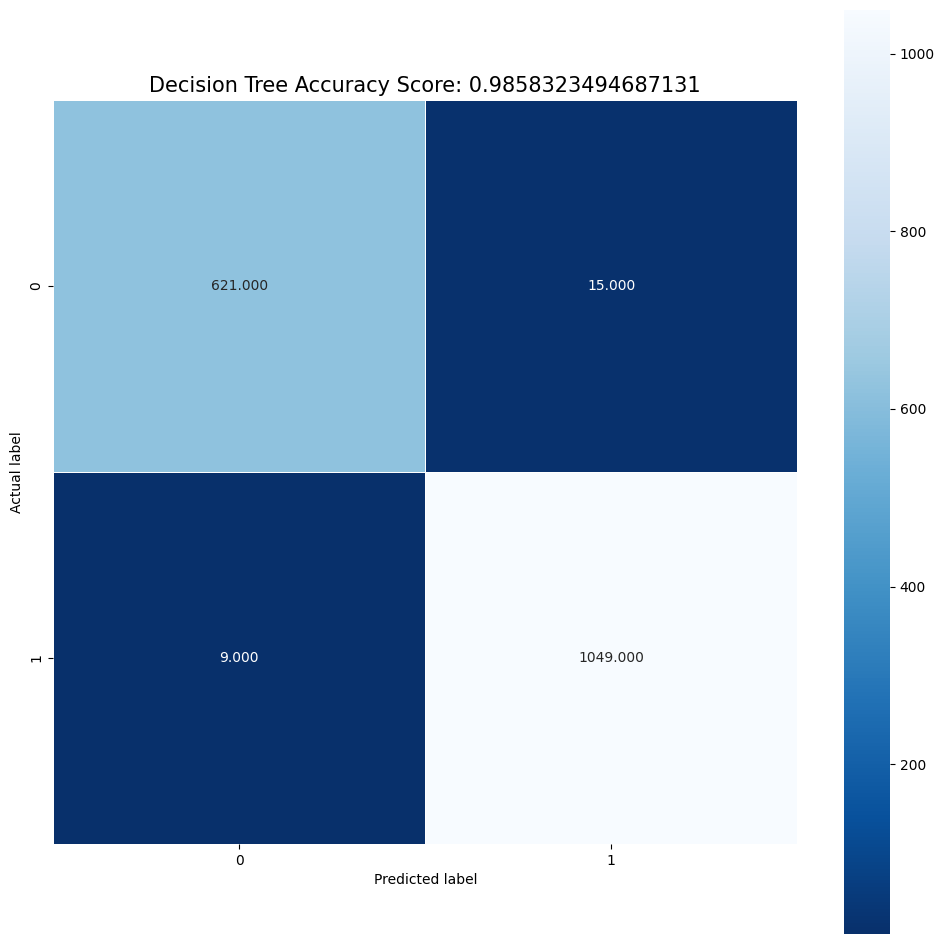

In [260]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm2, annot=True, fmt=".3f",linewidths=.5, square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score2)
plt.title(title,size=15);

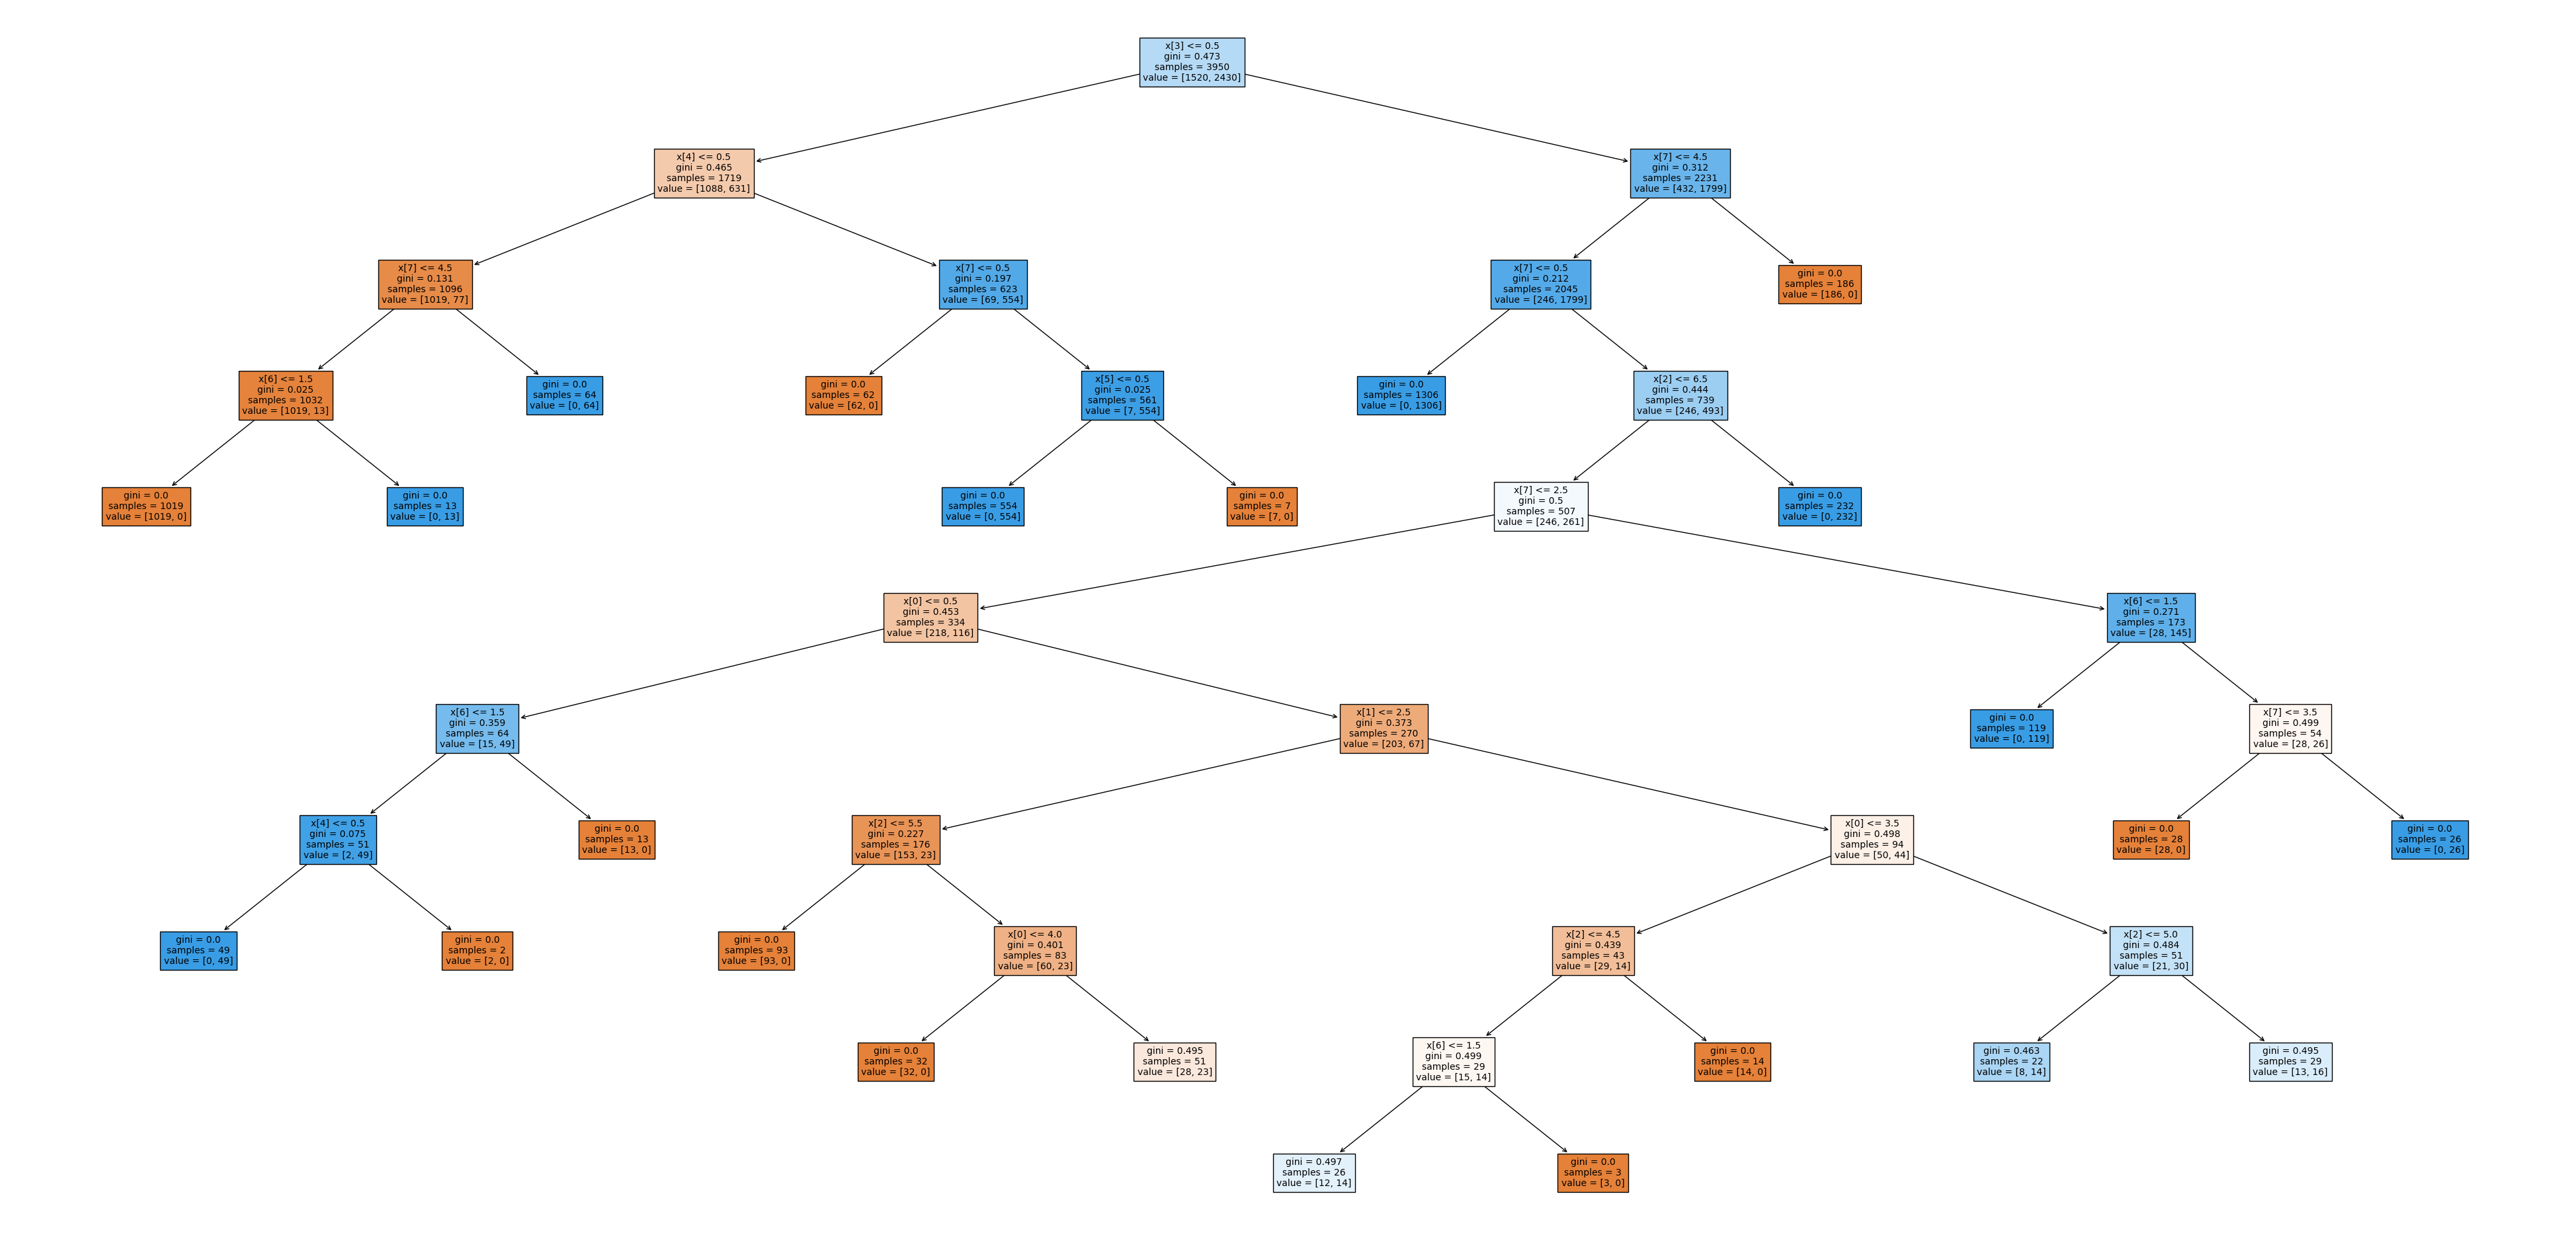

In [261]:
#Biểu diễn cây gini 
fig,ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf2,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [263]:
#Thuật toán Naïve Bayes
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, Y_train).predict(X_test)

In [265]:
bayes_score = metrics.accuracy_score(Y_test,bayes_pred)
print("Accuracy: ",bayes_score)
print("Report: ", metrics.classification_report(Y_test, bayes_pred))

Accuracy:  0.6351829988193625
Report:                precision    recall  f1-score   support

           0       0.75      0.04      0.08       636
           1       0.63      0.99      0.77      1058

    accuracy                           0.64      1694
   macro avg       0.69      0.52      0.43      1694
weighted avg       0.68      0.64      0.51      1694



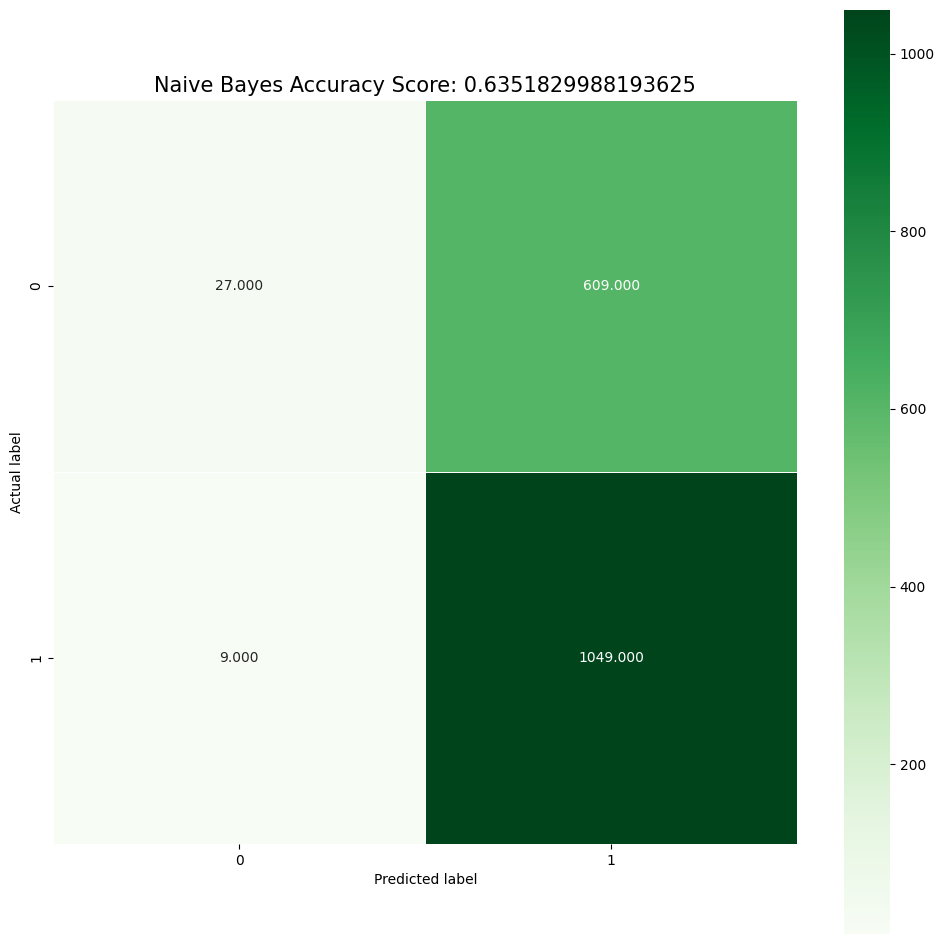

In [266]:
bayes_cm = metrics.confusion_matrix(Y_test,bayes_pred)

#Biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f",linewidths=.5,square=True,cmap="Greens");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title,size=15);
plt.show()